# Modeling and Simulation in Python

Chapter 5: Design

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [34]:
%matplotlib inline


#asdfasdfasdfa

from modsim import *

Quarantine would be like an additional phase between infection and recovery. Perhaps it would take students 2 days to realize they were ill and get quarantined, and 2 more days to recover. You now have 4 stocks, S, I, Q, and R, and 3 flow rates.

In [35]:
def make_system(ct, inc, pk, p1, p2):

    init = State(S=89, I=1, P=0, R=0, A=0)
    init /= sum(init)

    t0 = 0
    t_end = 7 * 14

    return System(init=init, t0=t0, t_end=t_end,
                  ct = ct, inc = inc, pk = pk, p1 = p1, p2 = p2, absent=0)

In [36]:
ct = 1/2
inc = 1/5
pk = 1/2
p1 = .80
p2 = .20

system = make_system(ct, inc, pk, p1, p2)

In [37]:
def update(state, system):
    unpack(system)
    s, i, p, r, a= state
    
    infected = ct * (i*p1 + p*p2) * s
    peak = inc * i
    recovered = pk * p
    absent = i*(1-p1)+p*(1-p2)
    
    s -= infected
    i += infected - peak
    p += peak - recovered
    r += recovered
    a += absent
    return State(S=s, I=i, P=p, R=r, A=a)

In [38]:
def run_simulation(system, update_func):
   
    S = TimeSeries()
    I = TimeSeries()
    P = TimeSeries()
    R = TimeSeries()
    A = TimeSeries()

    state = system.init
    t0 = system.t0
    S[t0], I[t0], P[t0], R[t0], A[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], P[t+1], R[t+1], A[t+1]= state
    
    system.S = S
    system.I = I
    system.P = P
    system.R = R
    system.A = A

In [39]:
def run_simulation2(system, update_func):
    frame = DataFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.loc[t+1] = update_func(frame.loc[t], system)
    
    system.results = frame
    
    return frame

In [40]:
def plot_results(S, I, P, R, A):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(P, '.', color = 'yellow', label='Peak')
    plot(R, ':', color='green', label='Recovered')
    plot(A, '*', color='Purple', label='Absences')
    legend(loc ='best')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [41]:
run_simulation2(system, update)


,S,I,P,R,A
0,0.988889,0.011111,0.000000,0.000000,0.000000
1,0.984494,0.013284,0.002222,0.000000,0.002222
2,0.979044,0.016077,0.003768,0.001111,0.006657
3,0.972379,0.019527,0.005099,0.002995,0.012887
4,0.964288,0.023712,0.006455,0.005545,0.020871
5,0.954520,0.028738,0.007970,0.008772,0.030778
6,0.942786,0.034724,0.009733,0.012757,0.042901
7,0.928774,0.041792,0.011811,0.017624,0.057632
8,0.912151,0.050056,0.014264,0.023529,0.075439
9,0.892586,0.059610,0.017143,0.030661,0.096862


In [42]:
#plot_results(system.S, system.I, system.P, system.R, system.A)


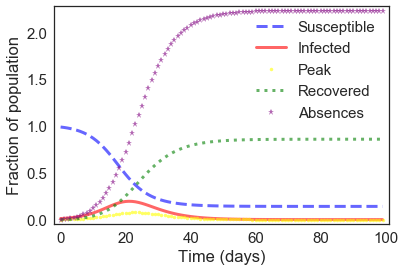

In [43]:
frame = system.results
plot_results(frame.S, frame.I, frame.P, frame.R, frame.A)

In [44]:
def run_simulation2(system, update_func):
    frame = DataFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.loc[t+1] = update_func(frame.loc[t], system)
    
    system.results = frame
    
    return frame



In [57]:
def plot_sweep(var, S, I, P, R, A):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(P, '.', color = 'yellow', label='Peak')
    plot(R, ':', color='green', label='Recovered')
    plot(A, '*', color='Purple', label='Absences')
    legend(loc ='best')
    decorate(xlabel=var,
             ylabel='Fraction of population')

In [65]:
def sweep_p(p1, system):
    p_array = linspace(.1, .95, 15)
    
    p_sweep_frame = DataFrame(columns=system.init.index)
    
    for p1 in p_array:
        system = make_system(ct, inc, pk, p1, p2)
        
        frame = run_simulation2(system, update)
        p_sweep_frame.loc[p1] = frame.loc[system.t_end]
        
    return p_sweep_frame
        
                

Saving figure to file Sweep_p1.pdf


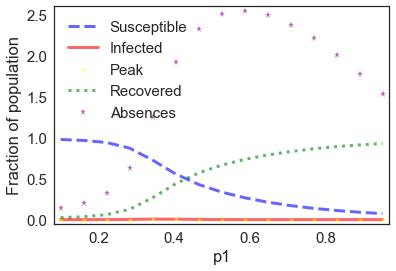

In [66]:
sweep_frame = sweep_p(p1, system)

plot_sweep('p1', sweep_frame.S, sweep_frame.I, sweep_frame.P, sweep_frame.R, sweep_frame.A)
savefig('Sweep_p1.pdf')

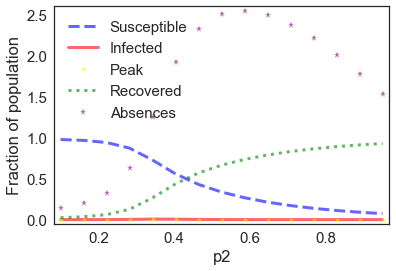

In [67]:
sweep_frame = sweep_p(p2, system)

plot_sweep('p2', sweep_frame.S, sweep_frame.I, sweep_frame.P, sweep_frame.R, sweep_frame.A)

